In [ ]:
import datacube
from datetime import datetime
from datetime import timedelta
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile
import geopandas as gpd
from pyproj import Proj, transform
from datacube.utils.cog import write_cog
from odc.ui import with_ui_cbk

from deafrica_tools.datahandling import load_ard, mostcommon_crs
from deafrica_tools.plotting import rgb, display_map
from deafrica_tools.bandindices import calculate_indices

In [ ]:
dc = datacube.Datacube(app="Burnt_area_mapping")

In [ ]:
# Define the area of interest
lat = 11.69 #12.016
lon = -4.425 #-4.475
buffer = 0.1

# Compute the bounding box for the study area
lat_range = (lat-buffer, lat+buffer)
lon_range = (lon-buffer, lon+buffer)

In [ ]:
a = int(input("How many years should be processed?"))
#b = int(input("Start year:"))

In [ ]:
start_date_pre = '2017-10-01'
end_date_pre='2017-12-01'
start_date_post ='2018-04-01'
end_date_post='2018-05-01'

In [ ]:
# Define load parameters
resolution = (-30, 30)
measurements = ['blue', 'green', 'red',
                'nir', 'swir_1', 'swir_2', 'pixel_quality', 'radiometric_saturation']
#collection_category='T1'
min_gooddata = 0.6

In [ ]:
# Choose the Landsat 8 products to load
products = ["ls8_sr"]

# Create a reusable query
query = {
    "x": lon_range,
    "y": lat_range,
    "resolution": resolution,
    "measurements": measurements, 
    "output_crs" : "EPSG:6933"
}
# Since this analysis calculates pixel areas,
# set the output projection to equal area projection EPSG:6933


In [ ]:
type(baseline_ard)
baseline_ard.to_array()

In [ ]:
baseline_nbr_all.
baseline_nbr_all

In [ ]:
while i < a-1:

    # Load all data in basline period avalible from ARD data
    baseline_ard = load_ard(dc=dc,
                            products=products,
                            time=(start_date_pre,end_date_pre),
                            min_gooddata=min_gooddata,
                            group_by='solar_day',
                            #collection_category=collection_category,
                            **query)

    # Calculate NBR for the baseline images
    baseline_ard = calculate_indices(baseline_ard,
                                     index='NBR',
                                     collection='c2',
                                     drop=False)
    if i==0:
        baseline_nbr_all = baseline_ard.to_array()
    else:
        baseline_nbr_all = baseline_nbr_all.concat(baseline_ard)
        
        
        
    
    # Compute median using all observations in the dataset along the time axis
    baseline_image = baseline_ard.median(dim='time')
    baseline_image_min = baseline_ard.min(dim='time')

    # Select NBR
    baseline_NBR = baseline_image.NBR
    baseline_NBR_min = baseline_image_min.NBR



    """
    # Calculate the start and end date for baseline data load
    start_date_pre = datetime.strftime(((datetime.strptime(fire_date, '%Y-%m-%d'))+timedelta(year=1)), '%Y-%m-%d')
    end_date_pre = datetime.strftime(((datetime.strptime(fire_date, '%Y-%m-%d'))+timedelta(year=1)), '%Y-%m-%d')

    # Calculate end date for post fire data load
    start_date_post = datetime.strftime(((datetime.strptime(fire_date, '%Y-%m-%d'))+timedelta(year=1)), '%Y-%m-%d')
    end_date_post = datetime.strftime(((datetime.strptime(fire_date, '%Y-%m-%d'))+timedelta(year=1)), '%Y-%m-%d')
    """
    i += 1

Plotting with indexing (does not work yet)

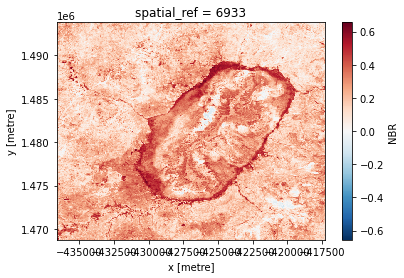

In [19]:
# Compute median using all observations in the dataset along the time axis
baseline_image = baseline_ard.sel(time=slice('2017-10-04','2017-12-31')).median(dim='time')
#baseline_image = baseline_ard.median(dim=(time=slice('2017-10-04','2017-12-31')))
#baseline_image_min = baseline_ard.min(dim='time')

# Select NBR
baseline_NBR = baseline_image.NBR
baseline_NBR.plot()
#baseline_NBR_min = baseline_image_min.NBR

plotting with slicing

In [46]:
baseline_2017 = baseline_ard.sel(time=slice('2017-10-04','2017-12-31'))
baseline_2017_image= baseline_2017.median(dim='time')
baseline_2017_NBR = baseline_2017_image.NBR


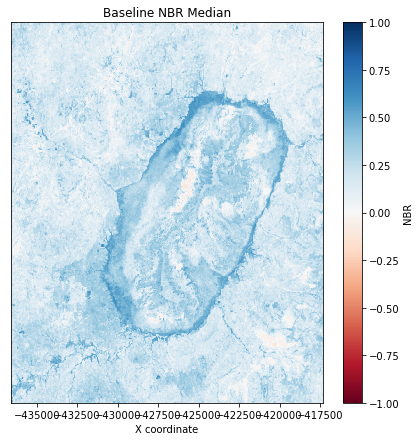

In [47]:
f, (ax2) = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
baseline_2017_NBR.plot(cmap='RdBu', vmin=-1, vmax=1, ax=ax2)
ax2.set_title('Baseline NBR Median')
ax2.yaxis.set_visible(False)
ax2.set_xlabel('X coordinate')

plt.show()

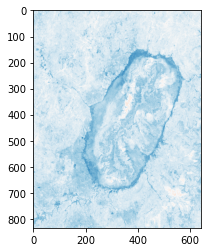

In [49]:
plt.imshow(baseline_2017_NBR,cmap='RdBu', vmin=-1, vmax=1)

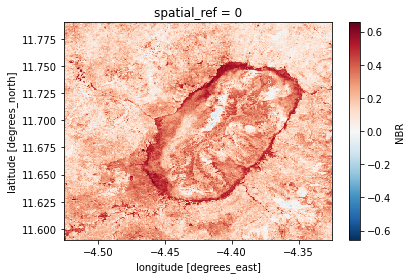

In [60]:
import rioxarray as rio
xds_lonlat = baseline_2017_NBR.rio.reproject("EPSG:4326")
xds_lonlat.plot()

### Plotting 5 Images

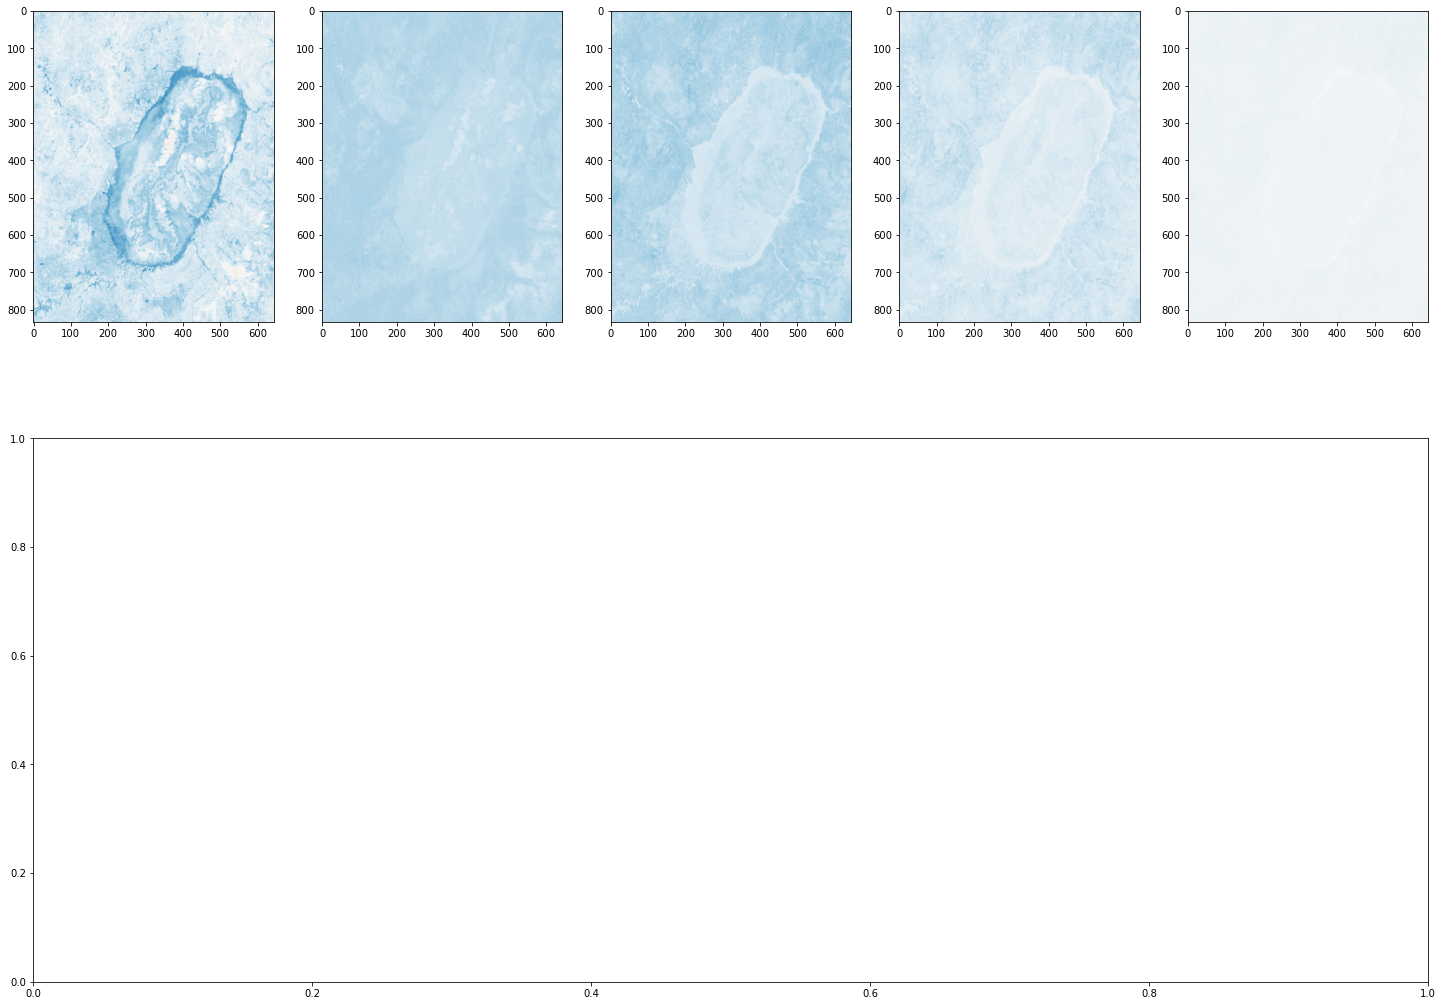

In [ ]:

fig=plt.figure(figsize=(25,20))
gs = fig.add_gridspec(2, 5, hspace=0, wspace=0.2)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[0, 4])
ax6 = fig.add_subplot(gs[1,:])

axes =[ax1, ax2, ax3, ax4, ax5]

for ax in axes:
    ax.xaxis.set_inverted(False)
    #color = plt.tricontourf(baseline_2017_NBR, vmax=1, vmin=-1, extend='both')
    nbr = Basemap(projection='mill', resolution='c',
                    llcrnrlat=11,urcrnrlat=12, llcrnrlon=-5,urcrnrlon=-4, ax=ax)
    
    if ax == ax1:
    
        nbr.drawparallels(np.arange(11.,12.,0.2),labels=[True,False,False,False],dashes=[2,2],  color = 'darkgrey', alpha =0.55)
        nbr.drawmeridians(np.arange(-5.,-4.,0.3),labels=[False,False,True,False],dashes=[2,2], color = 'darkgrey', alpha =0.55)
        #nbr.colorbar(location='bottom', cmap ='RdBu')
    
    elif ax == ax5:
        nbr.drawparallels(np.arange(11.,12.,0.2),labels=[False,True,False,False],dashes=[2,2],  color = 'darkgrey', alpha =0.55)
        nbr.drawmeridians(np.arange(-5.,-4.,0.3),labels=[False,False,True,False],dashes=[2,2], color = 'darkgrey', alpha =0.55)
        #nbr.colorbar( location='bottom', cmap ='RdBu')
        
       
    #elif ax == ax6:
     #   fig.colorbar(nbr.pcolormesh(baseline_2017['x'], baseline_2017['y'], np.squeeze(baseline_2017_NBR), vmin= -1, vmax =1, cmap='RdBu'), location = 'bottom')
        
    else:
        nbr.drawparallels(np.arange(11.,12.,0.2),labels=[False,False,False,False],dashes=[2,2],  color = 'darkgrey', alpha =0.55)
        nbr.drawmeridians(np.arange(-5.,-4.,0.3),labels=[False,False,True,False],dashes=[2,2], color = 'darkgrey', alpha =0.55)
        #nbr.colorbar(location='bottom', cmap ='RdBu')
        
        


nbr.imshow(baseline_2017_NBR,cmap='RdBu', vmin=-1, vmax=1, ax=ax1)
nbr.imshow(baseline_2017_image.nir, cmap='RdBu', vmin=-1, vmax=1, ax=ax2)
nbr.imshow(baseline_2017_image.swir_1, cmap='RdBu', vmin=-1, vmax=1, ax=ax3)
nbr.imshow(baseline_2017_image.swir_2, cmap='RdBu', vmin=-1, vmax=1, ax=ax4)
nbr.imshow(baseline_2017_image.blue, cmap='RdBu', vmin=-1, vmax=1, ax=ax5)

cbar = fig.colorbar(nbr.pcolormesh(baseline_2017['x'], baseline_2017['y'], np.squeeze(baseline_2017_NBR), vmin= -1, vmax =1, cmap='RdBu'), location = 'top', aspect=70, ax=ax6)
ax6.axis('off')
type(cbar)



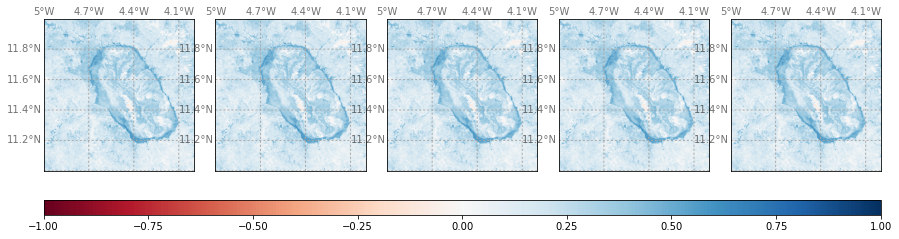

In [61]:
fig=plt.figure(figsize=(15, 4))
fields = [baseline_2017_NBR, baseline_2017.nir, baseline_2017.blue, baseline_2017.green, baseline_2017.red]
grid = AxesGrid(fig, 111,
               nrows_ncols =(1,5),
               cbar_mode = 'single',
               cbar_location = 'bottom',
               cbar_pad = 0.1,
               cbar_size = '2%',
               axes_pad = 0.3,
               share_all=True)


for ax in grid:
    #color = plt.tricontourf(baseline_2017_NBR, vmax=1, vmin=-1, extend='both')
    nbr = Basemap(projection='mill', resolution='c',
                    llcrnrlat=11,urcrnrlat=12, llcrnrlon=-5,urcrnrlon=-4, ax=ax)
    
    nbr.drawparallels(np.arange(11.,12.,0.2),labels=[True,False,False,False],dashes=[2,2],  color = 'darkgrey', alpha =0.55)
    nbr.drawmeridians(np.arange(-5.,-4.,0.3),labels=[False,False,True,False],dashes=[2,2], color = 'darkgrey', alpha =0.55)
    
        
    
    im = nbr.imshow(baseline_2017_NBR,cmap='RdBu', vmin=-1, vmax=1, ax=ax)
    
cbar = ax.cax.colorbar(im)
cbar = grid.cbar_axes[0].colorbar(im)
    




In [271]:
baseline_2017_NBR




<xarray.DataArray 'NBR' (y: 834, x: 644)>
array([[0.2339213 , 0.20200428, 0.1880475 , ..., 0.12142196, 0.11451049,
        0.10027587],
       [0.2339213 , 0.20200428, 0.1880475 , ..., 0.08904566, 0.04185527,
        0.0317026 ],
       [0.12797093, 0.16598105, 0.18625206, ..., 0.08596235, 0.03100708,
        0.03539179],
       ...,
       [0.5255878 , 0.5149798 , 0.5014092 , ..., 0.02248791, 0.12491953,
        0.17644104],
       [0.49218696, 0.47305858, 0.43494135, ..., 0.02248791, 0.12491953,
        0.17644104],
       [0.464594  , 0.39145356, 0.3550009 , ..., 0.03577691, 0.10741904,
        0.15842329]], dtype=float32)
Coordinates:
  * y            (y) float64 1.494e+06 1.494e+06 ... 1.469e+06 1.469e+06
  * x            (x) float64 -4.366e+05 -4.366e+05 ... -4.173e+05 -4.173e+05
    spatial_ref  int32 6933

In [81]:
baseline_2017_NBR['x']

<xarray.DataArray 'x' (x: 644)>
array([-436605., -436575., -436545., ..., -417375., -417345., -417315.])
Coordinates:
  * x            (x) float64 -4.366e+05 -4.366e+05 ... -4.173e+05 -4.173e+05
    spatial_ref  int32 6933
Attributes:
    units:       metre
    resolution:  30.0
    crs:         EPSG:6933

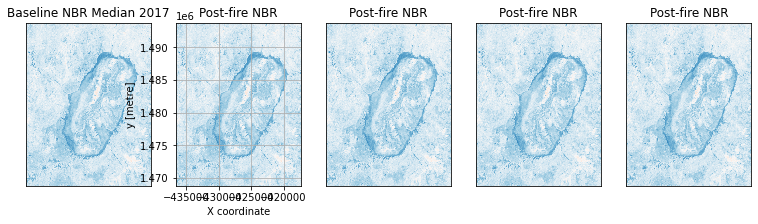

In [56]:
# Set up subplots
f,(ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(13, 3))

# Visualise post-fire image as true colour image
baseline_2017_NBR.plot(cmap='RdBu', vmin=-1, vmax=1, ax=ax1, add_colorbar= False)
ax1.set_title('Baseline NBR Median 2017')
ax1.yaxis.set_visible(False)
ax1.xaxis.set_visible(False)
ax1.set_xlabel('X coordinate')

# Visualise post-fire image as NBR image
baseline_2017_NBR.plot(cmap='RdBu', vmin=-1, vmax=1, ax=ax2, add_colorbar= False)
ax2.set_title('Post-fire NBR')
ax2.yaxis.set_visible(True)
ax2.xaxis.set_visible(True)
ax2.set_xlabel('X coordinate')
ax2.grid()

# Visualise post-fire image as NBR image
baseline_2017_NBR.plot(cmap='RdBu', vmin=-1, vmax=1, ax=ax3, add_colorbar= False)
ax3.set_title('Post-fire NBR')
ax3.yaxis.set_visible(False)
ax3.xaxis.set_visible(False)
ax3.set_xlabel('X coordinate')

# Visualise post-fire image as NBR image
baseline_2017_NBR.plot(cmap='RdBu', vmin=-1, vmax=1, ax=ax4, add_colorbar= False)
ax4.set_title('Post-fire NBR')
ax4.yaxis.set_visible(False)
ax4.xaxis.set_visible(False)
ax4.set_xlabel('X coordinate')

# Visualise post-fire image as NBR image
baseline_2017_NBR.plot(cmap='RdBu', vmin=-1, vmax=1, ax=ax5, add_colorbar= False)
ax5.set_title('Post-fire NBR')
ax5.yaxis.set_visible(False)
ax5.xaxis.set_visible(False)
ax5.set_xlabel('X coordinate')




plt.show()